A base de dados, proveniente do portal da transparência ( http://www.ssp.sp.gov.br/transparenciassp/Consulta2022.aspx ), oferece informações para entender a dinâmica dos roubos de veículos na cidade. O conjunto de dados referente ao mês de fevereiro de 2023.

#### Importação bibliotecas e dados

In [64]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [65]:
df = pd.read_csv('roubo_veiculos.csv', encoding='ISO-8859-1', sep=';')
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2023,298,298/2023,01/02/2023 00:00,01/02/2023 00:00,31/01/2023,20:30,A NOITE,31/01/2023,01/02/2023 00:00,Desconhecida,Não,NaN,NaN,0.0,Jardim Residencial Ravagnani,SUMARE,SP,NaN,NaN,Residência,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.PLANTÃO SUMARE,01º D.P. SUMARE,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENZ6E37,SP,SUMARE,Prata,FORD/KA SE 1.0 HA C,2020.0,2020.0,AUTOMOVEL,NaN,NaN
1,2023,170256,170256/2023,01/02/2023 00:06,01/02/2023 00:06,31/01/2023,21:20,A NOITE,31/01/2023,01/02/2023 00:06,Desconhecida,Não,NaN,AVENIDA BRASIL,403.0,PARQUE DAS NAÇÕES,S.ANDRE,SP,"-23,6391693","-46,52067314",Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,02º D.P. SANTO ANDRÉ,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELO9643,SP,S.ANDRE,Branco,VW/POLO MF,2018.0,NaN,AUTOMOVEL,NaN,NaN
2,2023,131,131/2023,01/02/2023 00:29,01/02/2023 00:29,31/01/2023,19:20,A NOITE,01/02/2023,01/02/2023 00:29,Desconhecida,Não,NaN,Rua Bernardino de Pinho Gomes,99.0,Jardim Sao Francisco,CUBATAO,SP,"-23,8873564","-46,4180081",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.CUBATÃO,DEL.POL.CUBATÃO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RML3J64,MG,S.GONCALO RIO ABAIXO,Branco,VW/GOL 1.0L MC4,NaN,NaN,AUTOMOVEL,NaN,NaN
3,2023,170325,170325/2023,01/02/2023 00:59,01/02/2023 00:59,31/01/2023,22:20,A NOITE,31/01/2023,01/02/2023 00:59,Desconhecida,Não,NaN,RUA CANHOBA,674.0,PERUS,S.PAULO,SP,"-23,40694755","-46,74239546",Outros,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,46º D.P. PERUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGI0816,SP,S.PAULO,Vermelho,CHEVROLET/ONIX 1.4MT LT,2013.0,NaN,AUTOMOVEL,NaN,NaN
4,2023,218,218/2023,01/02/2023 01:09,01/02/2023 01:09,31/01/2023,21:30,A NOITE,01/02/2023,01/02/2023 01:09,Desconhecida,Não,NaN,Estrada do Baygton,200.0,Loteamento Vale Florido,EMBU-GUACU,SP,"-23,9009139","-46,8660661",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.EMBU-GUAÇU,DEL.POL.EMBU-GUAÇU,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBJ6A34,SP,EMBU-GUACU,Vermelho,TOYOTA/YARIS HB XLS15 AT,2018.0,2019.0,AUTOMOVEL,NaN,NaN


In [66]:
# Verificar o tamanho da base de dados
print(f'Entradas: {df.shape[0]}')
print(f'Variaveis: {df.shape[1]}')

Entradas: 11119
Variaveis: 54


#### Limpeza dos dados

Quantidade de dados ausentes em relaçao ao dataset .



In [67]:
porcentagem_nulos = ((df.isnull().sum() / df.shape[0]) *100).sort_values(ascending=False)
porcentagem_nulos

MARCA_CELULAR               100.000000
EXAME                       100.000000
QUANT_CELULAR               100.000000
PARENTESCO                  100.000000
RELACIONAMENTO              100.000000
CORCUTIS                    100.000000
NACIONALIDADE               100.000000
NATURALIDADE                100.000000
GRAUINSTRUCAO                99.991006
PROFISSAO                    99.901070
ESTADOCIVIL                  99.829121
DESDOBRAMENTO                99.802140
SEXO                         99.586294
TIPOPESSOA                   99.586294
TIPOVINCULO                  99.586294
NATUREZAVINCULADA            99.586294
IDADE                        99.586294
DATANASCIMENTO               99.586294
VITIMAFATAL                  99.586294
NUMERO_BOLETIM_PRINCIPAL     52.369817
DESCR_TIPO_VEICULO           33.384297
DESCR_COR_VEICULO            33.321342
CIDADE_VEICULO               33.294361
UF_VEICULO                   33.294361
PLACA_VEICULO                33.231406
DESCR_MARCA_VEICULO      

Muitas colunas com grande quantidade de valores ausentes, quase 100%, o que dificulta a análise. Variáveis com mais de 50% de valores ausentes serão excluídas.

Como a proposta é analisar os roubos de veículos na cidade de São Paulo e não envolve nenhuma questão de projetar modelos de predição ou outros modelos de machine learning, as outras variáveis com valores ausentes serão mantidas pois se excluídas terá uma perda significativa de dados, tendo em vista que em uma variável ou outra ficou alguns campos em branco no momento de registro do boletim de ocorrência.

In [68]:
colunas_a_remover = porcentagem_nulos[porcentagem_nulos > 50].index

df = df.drop(columns=colunas_a_remover)

#### Conferir os tipos dos dados

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO_BO                   11119 non-null  int64  
 1   NUM_BO                   11119 non-null  int64  
 2   NUMERO_BOLETIM           11119 non-null  object 
 3   BO_INICIADO              11119 non-null  object 
 4   BO_EMITIDO               11119 non-null  object 
 5   DATAOCORRENCIA           11119 non-null  object 
 6   HORAOCORRENCIA           10737 non-null  object 
 7   PERIDOOCORRENCIA         11119 non-null  object 
 8   DATACOMUNICACAO          11119 non-null  object 
 9   DATAELABORACAO           11119 non-null  object 
 10  BO_AUTORIA               11119 non-null  object 
 11  FLAGRANTE                11119 non-null  object 
 12  LOGRADOURO               10431 non-null  object 
 13  NUMERO                   11061 non-null  float64
 14  BAIRRO                

In [70]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2023,298,298/2023,01/02/2023 00:00,01/02/2023 00:00,31/01/2023,20:30,A NOITE,31/01/2023,01/02/2023 00:00,Desconhecida,Não,NaN,0.0,Jardim Residencial Ravagnani,SUMARE,SP,NaN,NaN,Residência,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.PLANTÃO SUMARE,01º D.P. SUMARE,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,ENZ6E37,SP,SUMARE,Prata,FORD/KA SE 1.0 HA C,2020.0,2020.0,AUTOMOVEL
1,2023,170256,170256/2023,01/02/2023 00:06,01/02/2023 00:06,31/01/2023,21:20,A NOITE,31/01/2023,01/02/2023 00:06,Desconhecida,Não,AVENIDA BRASIL,403.0,PARQUE DAS NAÇÕES,S.ANDRE,SP,"-23,6391693","-46,52067314",Via pública,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,02º D.P. SANTO ANDRÉ,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,ELO9643,SP,S.ANDRE,Branco,VW/POLO MF,2018.0,NaN,AUTOMOVEL
2,2023,131,131/2023,01/02/2023 00:29,01/02/2023 00:29,31/01/2023,19:20,A NOITE,01/02/2023,01/02/2023 00:29,Desconhecida,Não,Rua Bernardino de Pinho Gomes,99.0,Jardim Sao Francisco,CUBATAO,SP,"-23,8873564","-46,4180081",Via pública,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.CUBATÃO,DEL.POL.CUBATÃO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,RML3J64,MG,S.GONCALO RIO ABAIXO,Branco,VW/GOL 1.0L MC4,NaN,NaN,AUTOMOVEL
3,2023,170325,170325/2023,01/02/2023 00:59,01/02/2023 00:59,31/01/2023,22:20,A NOITE,31/01/2023,01/02/2023 00:59,Desconhecida,Não,RUA CANHOBA,674.0,PERUS,S.PAULO,SP,"-23,40694755","-46,74239546",Outros,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,46º D.P. PERUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,FGI0816,SP,S.PAULO,Vermelho,CHEVROLET/ONIX 1.4MT LT,2013.0,NaN,AUTOMOVEL
4,2023,218,218/2023,01/02/2023 01:09,01/02/2023 01:09,31/01/2023,21:30,A NOITE,01/02/2023,01/02/2023 01:09,Desconhecida,Não,Estrada do Baygton,200.0,Loteamento Vale Florido,EMBU-GUACU,SP,"-23,9009139","-46,8660661",Via pública,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.EMBU-GUAÇU,DEL.POL.EMBU-GUAÇU,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,GBJ6A34,SP,EMBU-GUACU,Vermelho,TOYOTA/YARIS HB XLS15 AT,2018.0,2019.0,AUTOMOVEL


#### Tratamentos em outras variáveis

 - NUM_BO e NUMERO_BOLETIM -> As informações são praticamente as mesmas com a diferença que em NUMERO_BOLETIM adiciona apenas a extensão do ano 2023, tendo em vista que toda a base é de apenas um ano, é uma informação desnecessária.
 
 
 - BO_INICIADO e BO_EMITIDO trazem a mesma informação. Será unificado.
 
 
 - DATAELABORACAO é o mesmo que BO_EMITIDO.
 
 
 - UF é desnecessário pois todas os dados são de UF SP .
 
 
 - DESCR_MARCA_VEICULO serão separados para melhor analise. Obter a marca e o modelo do veículo separadamente.
 
 
 - Extrair o dia do mês e o mês da variável DATAOCORRENCIA para melhor analise .



In [71]:
# Exclusao das variaveis
df.drop(columns=['NUMERO_BOLETIM', 'BO_INICIADO','DATAELABORACAO', 'UF'], inplace=True)

In [72]:
# Novas colunas 'Marca' e 'Veiculo' a partir da coluna 'DESCR_MARCA_VEICULO'
df[['MARCA', 'MODELO']] = df['DESCR_MARCA_VEICULO'].str.split('/',1, expand=True)

# Excluir a coluna original 'DESCR_MARCA_VEICULO'
df.drop(columns=['DESCR_MARCA_VEICULO'], inplace=True)

In [73]:
# Convertendo a coluna DATAOCORRENCIA para o formato de data
df['DATAOCORRENCIA'] = pd.to_datetime(df['DATAOCORRENCIA'])

# Extraindo o dia do mês e o mês em colunas separadas
df['DIA'] = df['DATAOCORRENCIA'].dt.day
df['MES'] = df['DATAOCORRENCIA'].dt.month

In [74]:
df.head()

,ANO_BO,NUM_BO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,NUMERO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,MARCA,MODELO,DIA,MES
0,2023,298,01/02/2023 00:00,2023-01-31,20:30,A NOITE,31/01/2023,Desconhecida,Não,NaN,0.0,Jardim Residencial Ravagnani,SUMARE,NaN,NaN,Residência,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.PLANTÃO SUMARE,01º D.P. SUMARE,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,ENZ6E37,SP,SUMARE,Prata,2020.0,2020.0,AUTOMOVEL,FORD,KA SE 1.0 HA C,31,1
1,2023,170256,01/02/2023 00:06,2023-01-31,21:20,A NOITE,31/01/2023,Desconhecida,Não,AVENIDA BRASIL,403.0,PARQUE DAS NAÇÕES,S.ANDRE,"-23,6391693","-46,52067314",Via pública,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,02º D.P. SANTO ANDRÉ,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,ELO9643,SP,S.ANDRE,Branco,2018.0,NaN,AUTOMOVEL,VW,POLO MF,31,1
2,2023,131,01/02/2023 00:29,2023-01-31,19:20,A NOITE,01/02/2023,Desconhecida,Não,Rua Bernardino de Pinho Gomes,99.0,Jardim Sao Francisco,CUBATAO,"-23,8873564","-46,4180081",Via pública,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.POL.CUBATÃO,DEL.POL.CUBATÃO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,RML3J64,MG,S.GONCALO RIO ABAIXO,Branco,NaN,NaN,AUTOMOVEL,VW,GOL 1.0L MC4,31,1
3,2023,170325,01/02/2023 00:59,2023-01-31,22:20,A NOITE,31/01/2023,Desconhecida,Não,RUA CANHOBA,674.0,PERUS,S.PAULO,"-23,40694755","-46,74239546",Outros,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,46º D.P. PERUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,FGI0816,SP,S.PAULO,Vermelho,2013.0,NaN,AUTOMOVEL,CHEVROLET,ONIX 1.4MT LT,31,1
4,2023,218,01/02/2023 01:09,2023-01-31,21:30,A NOITE,01/02/2023,Desconhecida,Não,Estrada do Baygton,200.0,Loteamento Vale Florido,EMBU-GUACU,"-23,9009139","-46,8660661",Via pública,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.EMBU-GUAÇU,DEL.POL.EMBU-GUAÇU,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,GBJ6A34,SP,EMBU-GUACU,Vermelho,2018.0,2019.0,AUTOMOVEL,TOYOTA,YARIS HB XLS15 AT,31,1


In [75]:
# Exclusão das linhas 
#df.dropna(inplace=True)

## Análises
### Ocorrências x Bairros

A análise dos bairros mais afetados por roubos de veículos em São Paulo, identificou-se dentre os oito locais com maior incidência de casos, dois se sobressaem de maneira significativa, Centro e Jaraguá. 

Talvez seja prudente considerar a implementação de medidas de segurança mais rigorosas, como aumento da presença policial e instalação de câmeras de vigilância estrategicamente posicionadas. Além disso, promover uma maior conscientização da comunidade local sobre precauções de segurança ao estacionar e circular pela região pode ajudar a reduzir as oportunidades para atividades criminosas.

Por outro lado, o Centro, por ser uma área comercial e de grande fluxo de pessoas, pode estar suscetível a roubos de veículos devido à falta de áreas de estacionamento seguras. Investir na criação de estacionamentos supervisionados e bem iluminados, juntamente com o fortalecimento da presença policial, poderia dissuadir os criminosos. Além disso, a colaboração com as empresas locais para promover a segurança dos veículos de seus funcionários e clientes pode contribuir para uma melhoria geral.

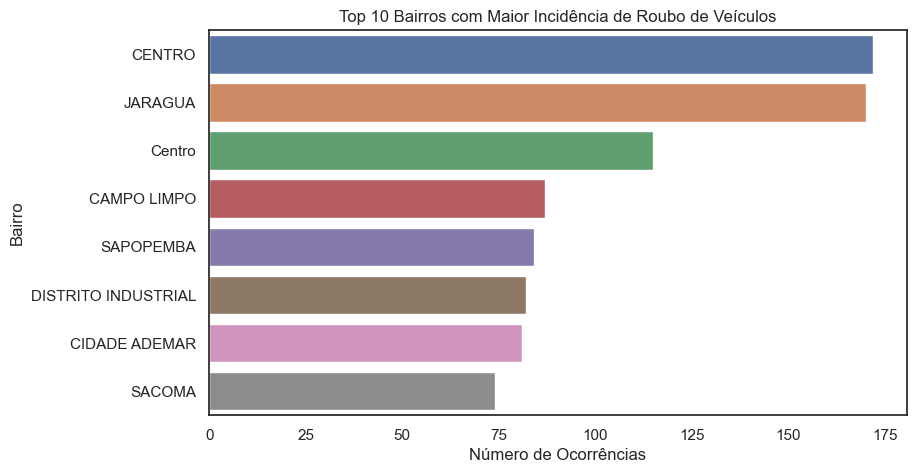

In [76]:
# Bairros com maior incidência de roubo de veículos
top_bairros = df['BAIRRO'].value_counts().head(8)
plt.figure(figsize=(9, 5))
sns.barplot(x=top_bairros.values, y=top_bairros.index)
plt.title("Top 10 Bairros com Maior Incidência de Roubo de Veículos")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Bairro")
plt.show()

### Ocorrências x Mês

A identificação do mês de fevereiro como o líder destacado em termos de ocorrências de roubo de veículos ao longo do ano sugere a presença de um padrão sazonal significativo. Vários fatores podem contribuir para essa tendência.

Primeiramente, é importante considerar as férias escolares, que normalmente ocorrem no mês de fevereiro em muitas regiões do Brasil. Com um aumento no número de pessoas fora de suas rotinas regulares, os criminosos podem perceber um ambiente mais propício para atividades ilícitas, incluindo roubos de veículos. O aumento do fluxo de turistas também pode desempenhar um papel nesse aumento, já que visitantes muitas vezes não estão familiarizados com a área e podem ser alvos mais fáceis.

Outro aspecto é o clima. Em algumas partes do país, fevereiro marca o ápice da estação de verão, caracterizada por dias mais longos e clima quente. Essas condições podem levar a uma maior circulação de pessoas nas ruas, tanto durante o dia quanto à noite, o que pode resultar em mais oportunidades para crimes, incluindo roubos de veículos.

Além disso, o aumento do consumo e atividade econômica associado ao período de Carnaval pode desviar a atenção das autoridades de segurança pública e dos cidadãos, o que os criminosos podem aproveitar para agir com mais impunidade.

Para lidar com essa sazonalidade acentuada, medidas preventivas específicas para o mês de fevereiro podem ser consideradas. Reforçar a presença policial em áreas propensas a roubos de veículos durante esse período, implementar campanhas de conscientização dirigidas aos turistas e moradores sobre precauções de segurança extra, e estabelecer parcerias com setores públicos e privados para garantir uma resposta coordenada são algumas estratégias que podem ser adotadas.

Em resumo, a análise da sazonalidade dos roubos de veículos em fevereiro aponta para a importância de reconhecer os fatores como férias escolares, aumento do fluxo turístico e características climáticas. Adotar medidas de segurança proativas durante esse período específico pode ajudar a mitigar o impacto desses fatores e reduzir o número de roubos de veículos nesse período crítico.

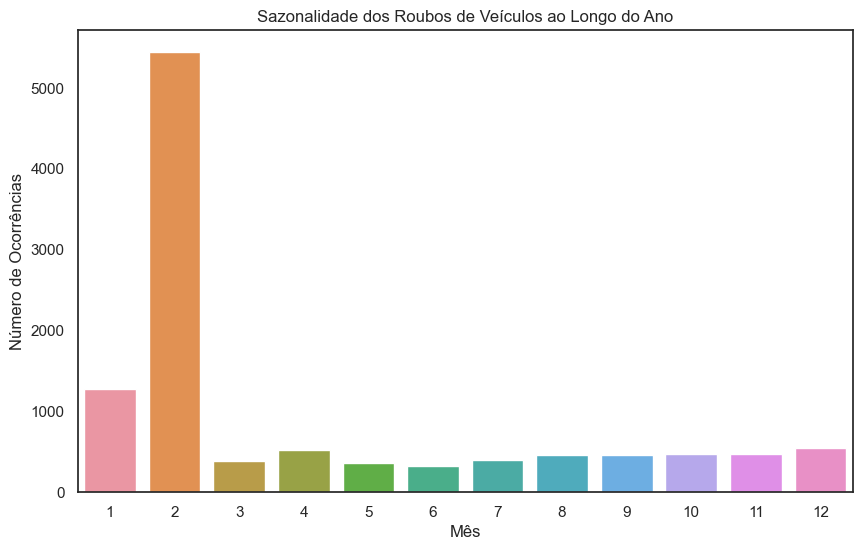

In [77]:
# Sazonalidade nos roubos ao longo do ano
df['MES'] = df['DATAOCORRENCIA'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='MES', data=df)
plt.title("Sazonalidade dos Roubos de Veículos ao Longo do Ano")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.show()

### Ocorrências x Horários

A análise dos horários de ocorrência de roubos de veículos aponta para uma concentração entre 19h e 22h. Essa tendência pode ser explicada por uma combinação de fatores relacionados a padrões de atividade humana e condições de visibilidade.

Durante esse período, muitas pessoas estão retornando para casa após um dia de trabalho, escola ou outras atividades. Isso cria uma janela de oportunidade para os criminosos, pois os motoristas podem estar distraídos e cansados, o que os torna alvos mais vulneráveis. Além disso, o aumento do tráfego nesses horários pode levar a congestionamentos, o que pode tornar mais fácil para os criminosos se aproximarem dos veículos e realizarem os roubos.

Outro fator a considerar é a diminuição da luz natural à medida que o dia avança para a noite. A redução da visibilidade pode facilitar as atividades criminosas, já que os criminosos podem se esconder com mais facilidade e as vítimas podem ter dificuldade em identificá-los com precisão.

Para abordar essa tendência, é essencial implementar estratégias de segurança específicas para esses horários críticos. Aumentar a presença policial em áreas de maior risco durante a tarde e à noite, melhorar a iluminação pública em locais estratégicos, além de educar os cidadãos sobre medidas de precaução ao dirigir e estacionar em horários mais suscetíveis, podem ser ações eficazes.

Ao reconhecer a concentração de roubos de veículos entre 19h e 22h, as autoridades e comunidades podem colaborar para criar um ambiente mais seguro, reduzindo as oportunidades para atividades criminosas e protegendo os cidadãos durante esses momentos cruciais do dia.

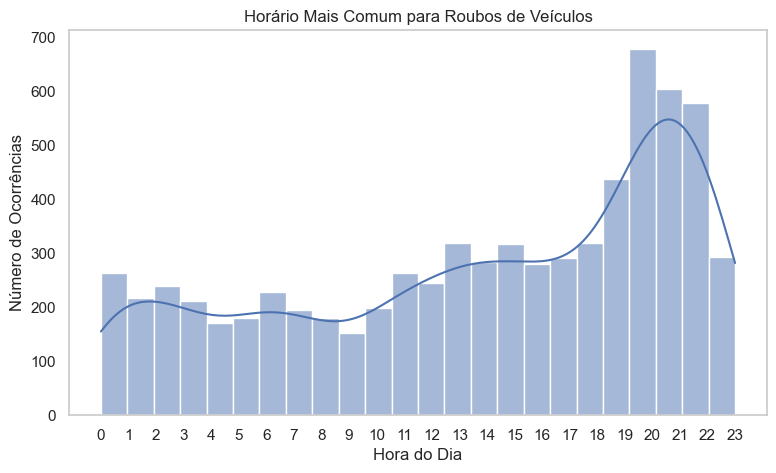

In [129]:
df['HORAOCORRENCIA'] = pd.to_datetime(df['HORAOCORRENCIA']).dt.time

# Horário mais comum para roubos de veículos
df['HORAOCORRENCIA'] = pd.to_datetime(df['HORAOCORRENCIA'], format='%H:%M:%S')
df['HORA'] = df['HORAOCORRENCIA'].dt.hour

plt.figure(figsize=(9, 5))
sns.histplot(df['HORA'], bins=24, kde=True)
plt.title("Horário Mais Comum para Roubos de Veículos")
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Ocorrências")
plt.xticks(range(24))
plt.grid(False) 
plt.show()

### Ocorrências x Local

A análise da descrição dos locais das ocorrências de roubos de veículos revela que a categoria "Via pública" se destaca de maneira significativa em relação a outras localizações. Essa tendência pode ser atribuída a diversos fatores relacionados à natureza das vias públicas e às oportunidades que elas oferecem aos criminosos.

As vias públicas são espaços de acesso livre e movimentação constante de pessoas e veículos, o que pode fornecer uma cobertura propícia para ações criminosas. A facilidade de abordagem e fuga é ampliada em vias públicas, tornando-as locais atrativos para criminosos que buscam realizar roubos de veículos de forma rápida e discreta.

A visibilidade limitada em muitas áreas urbanas, especialmente à noite, pode proporcionar um ambiente favorável para criminosos se aproximarem dos veículos sem serem detectados. Além disso, a diversidade de vias públicas, desde avenidas movimentadas até ruas mais tranquilas, permite que os criminosos escolham locais estrategicamente vantajosos para suas atividades.

Para combater essa tendência, é essencial adotar medidas que visem aumentar a segurança nas vias públicas. Investir em iluminação adequada, especialmente em áreas mais escuras, pode ajudar a inibir atividades criminosas. Aumentar a presença policial e patrulhamento em regiões com histórico de ocorrências também é uma estratégia eficaz.

Além disso, conscientizar os cidadãos sobre a importância de adotar precauções de segurança ao estacionar e circular em vias públicas pode contribuir para reduzir as oportunidades para roubos. Encorajar práticas como trancar os veículos, evitar deixar objetos de valor à vista e estar atento ao ambiente ao redor pode dissuadir os criminosos.

Ao reconhecer a prevalência de roubos de veículos em vias públicas, é possível implementar medidas específicas para fortalecer a segurança nesses locais e proporcionar maior tranquilidade para os cidadãos, mitigando a vulnerabilidade que esses espaços podem apresentar.

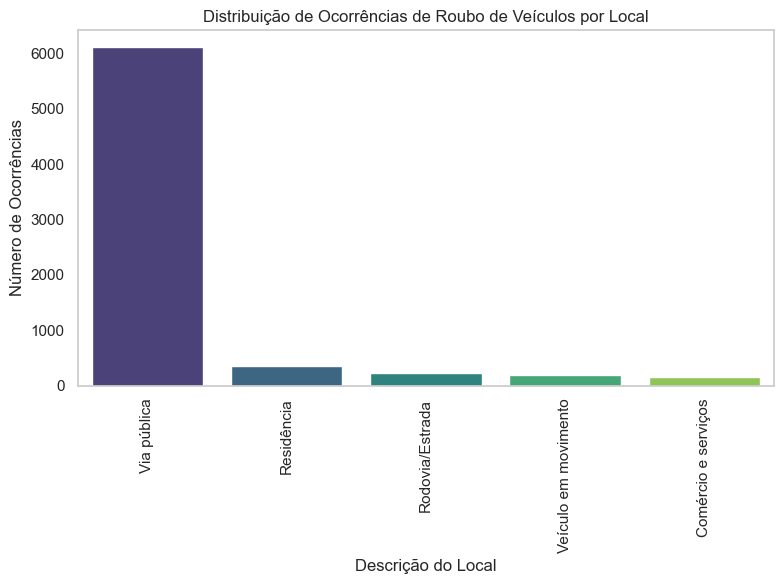

In [128]:
local = df['DESCRICAOLOCAL'].value_counts().head()


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=local.index, y=local.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Descrição do Local')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição de Ocorrências de Roubo de Veículos por Local')
plt.tight_layout()
plt.grid(False) 
plt.show()

### Ocorrências x Cidades 

A análise das cidades com maior incidência de roubos de veículos destaca São Paulo como líder disparado. Isso se deve à alta densidade populacional, grande número de veículos em circulação e complexa estrutura urbana da cidade. As diversas vias públicas, oferecem oportunidades para crimes. Para enfrentar esse desafio, é necessário reforçar a presença policial em áreas de risco, adotar tecnologias de vigilância e promover conscientização pública sobre medidas preventivas de segurança. Ao reconhecer essa disparidade, as autoridades podem desenvolver abordagens adaptadas a cada bairro, visando tornar São Paulo mais seguro para todos.

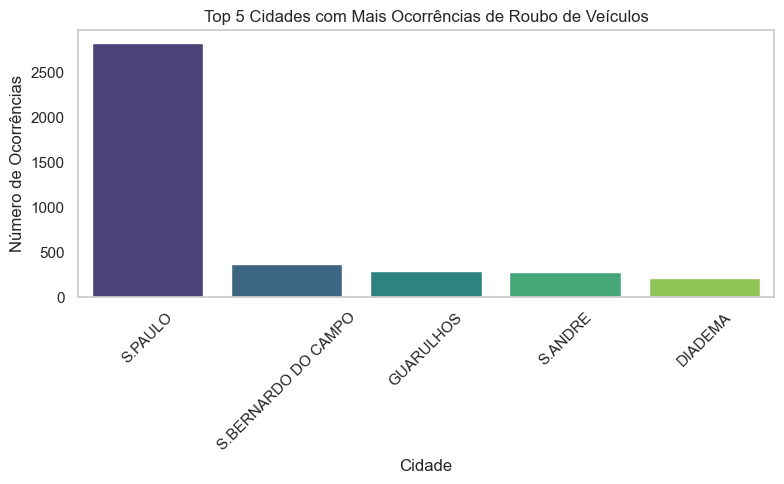

In [127]:
top_cidades = df['CIDADE'].value_counts().head()


plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(x=top_cidades.index, y=top_cidades.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Cidade')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Cidades com Mais Ocorrências de Roubo de Veículos')
plt.tight_layout()
plt.grid(False) 
plt.show()

### Ocorrências x Cor dos Veículos

Embora a análise de roubos por cores de veículos possa parecer um detalhe superficial, a predominância de veículos de cor branca como alvos de roubos pode oferecer algumas perspectivas importantes. É possível que essa tendência seja influenciada por alguns fatores, que vão desde preferências do mercado até fatores práticos relacionados à criminalidade.

Carros de cor branca podem ser escolhidos por serem mais discretos e menos chamativos. Essa característica pode torná-los alvos atraentes para criminosos, pois um veículo branco pode ser mais facilmente escondido em meio ao tráfego ou a áreas urbanas. 

Outro aspecto a considerar é a popularidade dos carros brancos no mercado. Se os veículos de cor branca representam uma grande proporção dos carros em circulação, é natural que eles também sejam mais vistos em roubos, simplesmente devido à maior disponibilidade desses modelos.

Para lidar com essa tendência, é importante não subestimar a análise das cores dos veículos. Medidas como fortalecer o policiamento em áreas com histórico de roubos de veículos brancos, incentivar proprietários a adotar dispositivos antifurto e promover a conscientização sobre a importância da segurança independente da cor do veículo podem ser eficazes.

Embora a análise das cores de veículos possa parecer trivial, a liderança dos carros de cor branca nos roubos pode ser influenciada por sua discrição e popularidade.

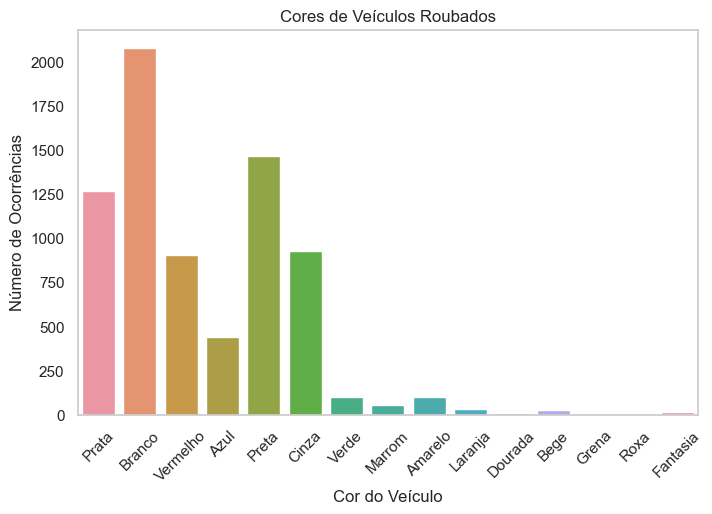

In [126]:
df = df.dropna(subset=['DESCR_COR_VEICULO'])
unique_colors = df['DESCR_COR_VEICULO'].unique()

# Cores de Veículos Roubados
plt.figure(figsize=(8, 5))
sns.countplot(x='DESCR_COR_VEICULO', data=df, order=unique_colors)
plt.title("Cores de Veículos Roubados")
plt.xlabel("Cor do Veículo")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45)
plt.grid(False) 
plt.show()

### Ocorrências x Marcas e Modelos de veículos

A análise das marcas e modelos com maior incidência de roubos revela que a marca Honda, especialmente o modelo CG 160 FAN, lidera com destaque. Essa diferença significativa pode ser atribuída a uma combinação de fatores, incluindo popularidade de mercado, características dos modelos e facilidades relacionadas ao roubo de motocicletas.

O modelo CG 160 FAN é um dos modelos mais vendidos e reconhecidos da Honda no Brasil. Sua grande presença nas ruas pode ser um fator que contribui para sua alta incidência em roubos. Além disso, as motocicletas tendem a ser mais vulneráveis a roubos devido à sua mobilidade, o que facilita a fuga rápida após o crime.

A facilidade de roubo de motocicletas é, de fato, um fator a ser considerado. Por serem mais leves e compactas do que carros, as motos podem ser manobradas com maior agilidade em espaços apertados, o que pode facilitar a fuga dos criminosos. A demanda por peças de reposição também pode influenciar, já que as motocicletas roubadas podem ser desmontadas e vendidas como peças sobressalentes.

É fundamental aumentar a conscientização dos proprietários de motocicletas sobre medidas de segurança, como o uso de dispositivos antifurto, travas de guidão e estacionamento seguro. Além disso, fortalecer o policiamento em áreas com histórico de roubos de motocicletas e colaborar com as autoridades para rastrear e recuperar veículos roubados são estratégias importantes.

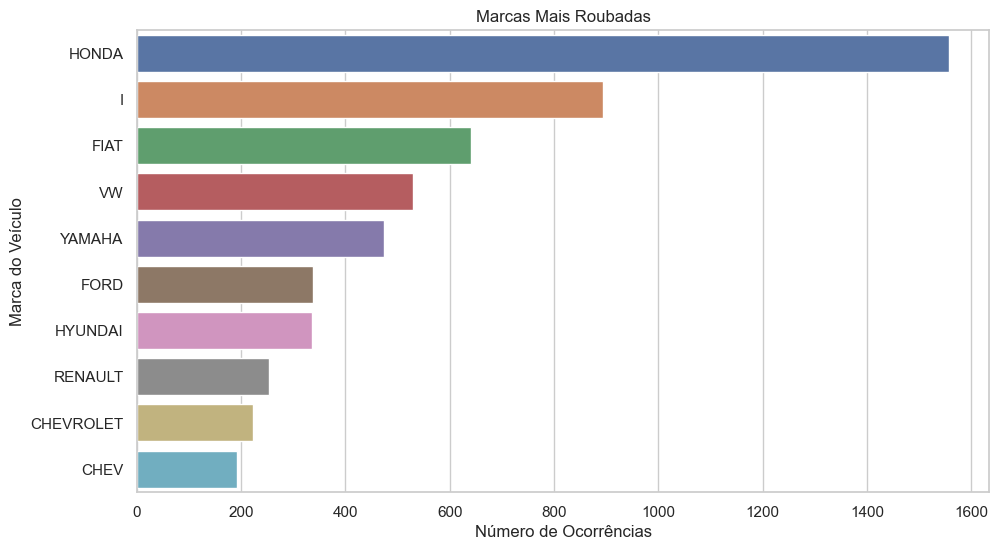

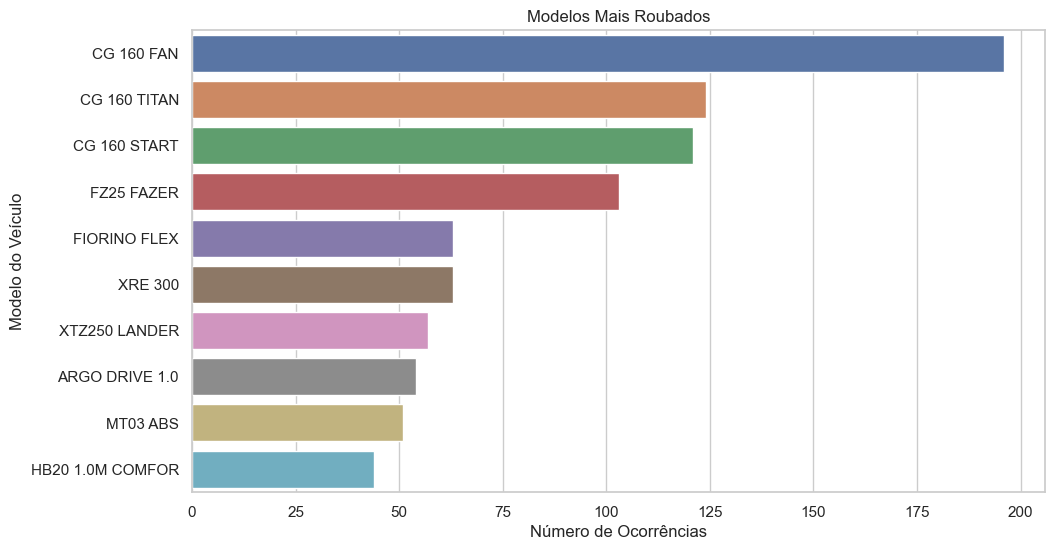

In [118]:
# Verificando as marcas e modelos únicos
unique_models = df['MARCA'] + " " + df['MODELO']
unique_models = unique_models.dropna().unique()

# Marcas e Modelos Mais Roubados
plt.figure(figsize=(11, 6))
sns.countplot(y='MARCA', data=df, order=df['MARCA'].value_counts().index[:10])
plt.title("Marcas Mais Roubadas")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Marca do Veículo")
plt.show()

plt.figure(figsize=(11, 6))
sns.countplot(y='MODELO', data=df, order=df['MODELO'].value_counts().index[:10])
plt.title("Modelos Mais Roubados")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Modelo do Veículo")
plt.show()

### Ocorrências x Dias da semana

A análise dos dias da semana com maior incidência de roubos de veículos revela que a segunda-feira e a quinta-feira se destacam ligeiramente em relação aos demais dias. Embora a diferença não seja tão acentuada, essa observação pode fornecer  percepções sobre os padrões de atividade criminosa ao longo da semana.

A segunda-feira pode estar associada a um aumento nas ocorrências devido ao retorno das atividades após o final de semana. As pessoas podem estar mais desatentas ou desorganizadas, o que pode torná-las alvos mais fáceis. Além disso, o trânsito mais congestionado em áreas urbanas durante as manhãs de segunda-feira pode criar oportunidades para abordagens rápidas e furtivas.

Já a quinta-feira pode ser impactada pela antecipação do final de semana, com muitas pessoas saindo para compromissos sociais ou lazer. Essa maior movimentação pode proporcionar oportunidades para atividades criminosas, especialmente no período da tarde e da noite.

Em resumo, a análise dos dias da semana com maior incidência de roubos aponta para segundas-feiras e quintas-feiras como levemente mais propícias a esses crimes. A conscientização pública e o reforço da segurança nesses dias podem ajudar a mitigar o impacto dessas tendências e proporcionar um ambiente mais seguro para os cidadãos.

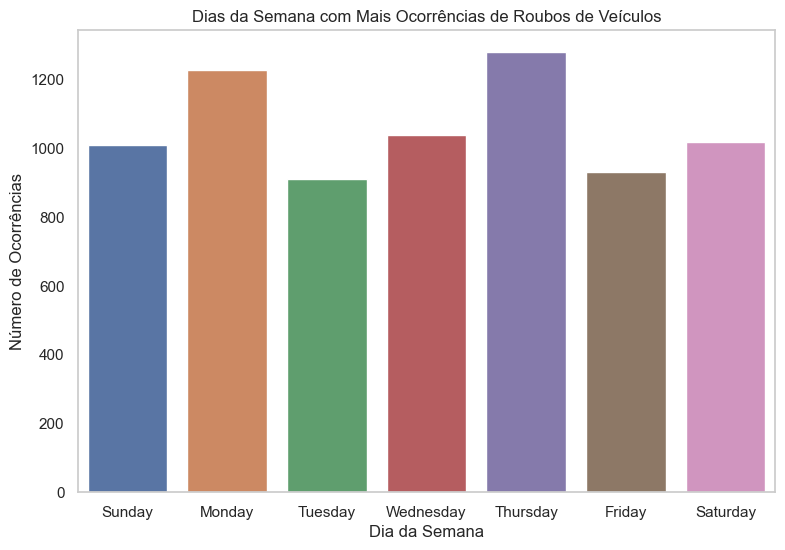

In [125]:
df['DIA_SEMANA'] = df['DATAOCORRENCIA'].dt.day_name()

plt.figure(figsize=(9, 6))
sns.countplot(x='DIA_SEMANA', data=df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title("Dias da Semana com Mais Ocorrências de Roubos de Veículos")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Ocorrências")
plt.grid(False) 
plt.show()

### Ocorrências x Faixa Dia do Mês

A análise da quantidade de ocorrências de roubos de veículos em relação aos dias do mês revelou uma disparidade notável, com uma incidência significativamente maior nos primeiros dias do mês, de 1 a 5. Essa tendência pode ser atribuída a fatores que podem influenciar a ocorrência de roubos em diferentes momentos do mês.

O início do mês muitas vezes está relacionado ao pagamento de salários e benefícios sociais, o que pode aumentar a circulação de dinheiro e bens, incluindo veículos. Esse aumento na movimentação financeira pode criar um ambiente propício para atividades criminosas, já que os criminosos podem identificar mais oportunidades para agir.

Para abordar essa tendência, é fundamental intensificar as medidas de conscientização e segurança nos primeiros dias do mês. Campanhas educativas que destacam a importância de precauções de segurança consistentes, independentemente do dia do mês, podem ajudar a mitigar o risco de roubos. Além disso, a colaboração com instituições financeiras e empresas para promover medidas preventivas junto aos beneficiários pode reduzir as oportunidades para atividades criminosas.

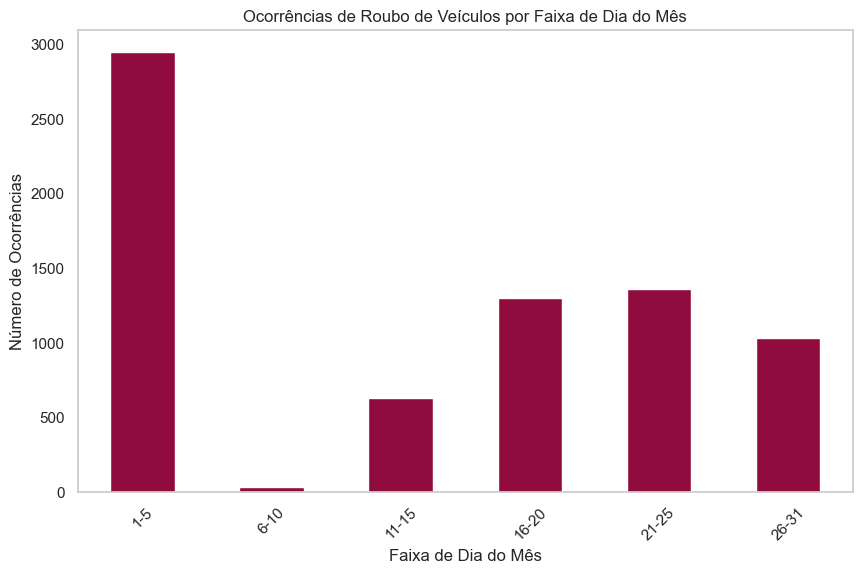

In [116]:
bins = [0, 5, 10, 15, 20, 25, 31]
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-31"]
df["FAIXA_DIA_MES"] = pd.cut(df["DIA"], bins=bins, labels=labels, right=False)

# Contar as ocorrências de roubo por faixa de dia do mês
ocorrencias_por_faixa = df["FAIXA_DIA_MES"].value_counts().sort_index()

# Personalizar o estilo do gráfico
plt.figure(figsize=(10, 6))
ocorrencias_por_faixa.plot(kind="bar", color="#900C3F")  # Altera a cor para roxo (purple)
plt.title("Ocorrências de Roubo de Veículos por Faixa de Dia do Mês")
plt.xlabel("Faixa de Dia do Mês")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()

### Ocorrências x Flagrantes

Os roubos em sua maioria nao são em flagrantes. Essa discrepância pode sugerir que a maioria dos roubos de veículos não é testemunhada ou interrompida durante a execução do crime, o que pode ter implicações diversas.

A ausência de flagrantes pode ser explicada por vários fatores. Muitos roubos de veículos podem ocorrer em locais isolados ou em horários em que há menos testemunhas presentes. Além disso, os criminosos podem usar táticas de abordagem rápida e dissimulação para evitar serem detectados em flagrante.

Essa análise ressalta a necessidade de adotar medidas proativas de prevenção, uma vez que a falta de flagrantes pode dificultar a resposta imediata das autoridades. Investir em tecnologias de vigilância, como câmeras de segurança, pode ajudar a monitorar áreas propensas a roubos e identificar atividades suspeitas. Além disso, a conscientização pública sobre o que fazer em caso de testemunho de um roubo em andamento pode incentivar a colaboração da comunidade com as autoridades.

A abordagem preventiva é fundamental para reduzir os roubos de veículos, mesmo quando flagrantes são menos comuns. Ao adotar estratégias que desencorajam os criminosos e facilitam a identificação de atividades suspeitas, é possível aumentar a eficácia da resposta policial e, consequentemente, reduzir o número geral de roubos de veículos.

Em resumo, a análise dos roubos sem flagrantes enfatiza a importância de abordagens preventivas.

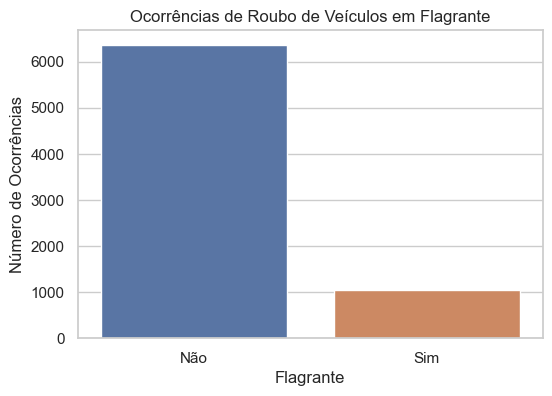

In [100]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FLAGRANTE', data=df)
plt.title("Ocorrências de Roubo de Veículos em Flagrante")
plt.xlabel("Flagrante")
plt.ylabel("Número de Ocorrências")
plt.show()

In [83]:
df["LATITUDE"] = df["LATITUDE"].str.replace(",", ".").astype(float)
df["LONGITUDE"] = df["LONGITUDE"].str.replace(",", ".").astype(float)

fig = px.scatter_mapbox(df.dropna(),
                        lat='LATITUDE',
                        lon='LONGITUDE',
                        mapbox_style='open-street-map',
                        title='Mapa de Dispersão de Roubos de Veículos em São Paulo',
                        opacity=0.5) 

fig.update_layout(mapbox_zoom=6.5)
fig.show()

A representação visual da densidade dos roubos em um mapa oferece uma visão clara da distribuição geográfica desses eventos. Essa visualização pode ser uma ferramenta valiosa para identificar áreas de maior concentração de roubos de veículos, auxiliando na alocação estratégica de recursos de segurança e na implementação de medidas preventivas direcionadas.